## Loading the flowers dataset





In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the dataset


In [3]:
Path = "/content/drive/My Drive/flowers/data/"


In [4]:
# import needed libraries
import os as os
from PIL import Image
from array import array
import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.utils import np_utils
from sklearn import preprocessing

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam
from keras import regularizers
from keras import layers
seed = 7
np.random.seed(seed)

# for API
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
#from keras import backend as K

#K.set_image_dim_ordering( 'tf' )

In [5]:
listing = os.listdir( Path ) 
num_folders = len(listing)
print ( num_folders)
print (listing)

17
['8', '16', '15', '3', '5', '7', '6', '2', '4', '9', '14', '13', '0', '12', '1', '11', '10']


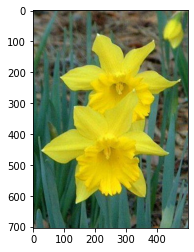

In [6]:
## Analyze the image dataset
# Read a sample image file
import skimage.io as io
path = "/content/drive/My Drive/flowers/data/0/"
files = os.listdir(path)
#print(len(files))
#print(files[0])
#print(files[1])
imgfile = files[0]
img = io.imread(path + imgfile)

plt.imshow(img)
plt.show()

In [7]:
pwd

'/content'

In [8]:
!ls -l /content/drive/MyDrive/flowers/data/0

total 2982
-rw------- 1 root root 52074 May  3  2006 image_0001.jpg
-rw------- 1 root root 42230 May  3  2006 image_0002.jpg
-rw------- 1 root root 47305 May  3  2006 image_0003.jpg
-rw------- 1 root root 30888 May  3  2006 image_0004.jpg
-rw------- 1 root root 33520 May  3  2006 image_0005.jpg
-rw------- 1 root root 28427 May  3  2006 image_0006.jpg
-rw------- 1 root root 38840 May  3  2006 image_0007.jpg
-rw------- 1 root root 34031 May  3  2006 image_0008.jpg
-rw------- 1 root root 32056 May  3  2006 image_0009.jpg
-rw------- 1 root root 41286 May  3  2006 image_0010.jpg
-rw------- 1 root root 35442 May  3  2006 image_0011.jpg
-rw------- 1 root root 36551 May  3  2006 image_0012.jpg
-rw------- 1 root root 49112 May  3  2006 image_0013.jpg
-rw------- 1 root root 31451 May  3  2006 image_0014.jpg
-rw------- 1 root root 34745 May  3  2006 image_0015.jpg
-rw------- 1 root root 30205 May  3  2006 image_0016.jpg
-rw------- 1 root root 37789 May  3  2006 image_0017.jpg
-rw------- 1 root ro

In [9]:
#Check out few file names for the photos - 

#for Linux uncomment the following line
!ls drive/MyDrive/flowers/data/0 | head -5

image_0001.jpg
image_0002.jpg
image_0003.jpg
image_0004.jpg
image_0005.jpg


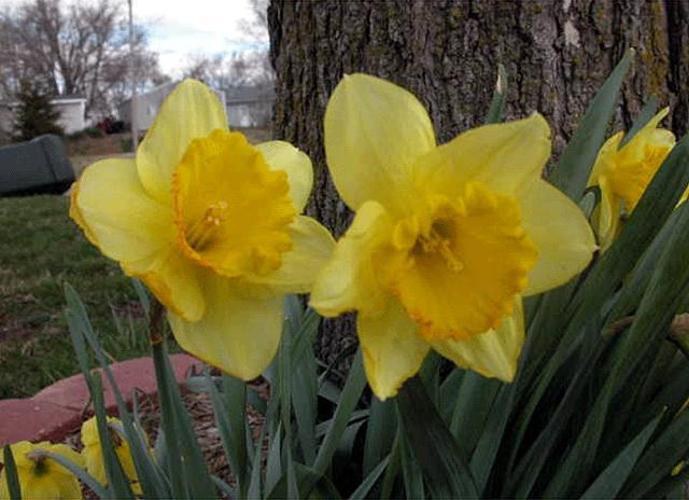

In [10]:
#Load an image using Keras image class
image_file = 'drive/MyDrive/flowers/data/0/image_0001.jpg'
flower_image = tf.keras.preprocessing.image.load_img(image_file)

#Inspect image
flower_image

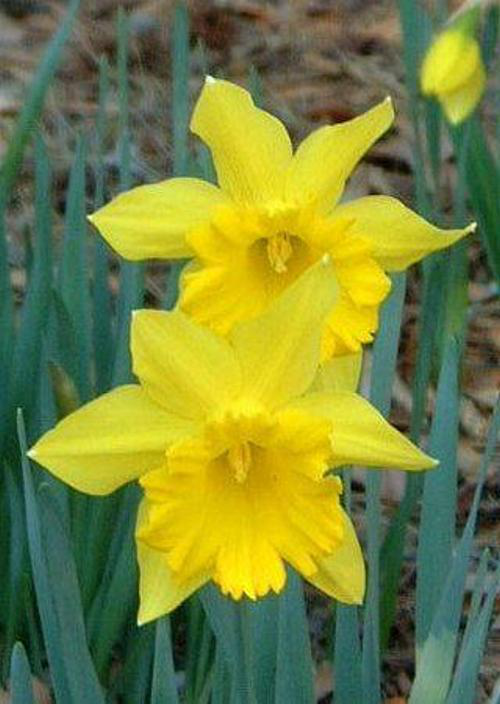

In [11]:
flower_image2 = tf.keras.preprocessing.image.load_img('drive/MyDrive/flowers/data/0/image_0003.jpg')
flower_image2

In [12]:
flower_image.size
# image is of shape 704 * 500 with 3 channels

(689, 500)

In [13]:
flower_image2.size

(500, 704)

In [14]:
#Convert an image to numpy array
flower_array = tf.keras.preprocessing.image.img_to_array(flower_image2)
print('Shape of numpy array', flower_array.shape)

Shape of numpy array (704, 500, 3)


In [15]:
# Display images and their labels
trainArray = [[]]
trainImagesPaths = []
trainImagesCategories = []
trainImg = []
scaleTo = 128
seed = 7

t0=time.time()

for imgFolder in listing:
  print(imgFolder)
  path = "/content/drive/My Drive/flowers/data/" + imgFolder + '/'
  files = os.listdir( path ) 
  for imgFile in files:
    imgPath = path + imgFile
    trainArray.append([imgPath, imgFolder]) # image path, image folder
    trainImagesPaths.append(imgPath) # paths to images
    trainImagesCategories.append(imgFolder) # labels
    
    trainImg.append(cv2.resize(cv2.imread(imgPath), (scaleTo, scaleTo))) # images
    
t1=time.time()
print(t1-t0," seconds")

8
16
15
3
5
7
6
2
4
9
14
13
0
12
1
11
10
648.4463131427765  seconds


In [16]:
trainImagesPaths[1] # gives the path to the first image

'/content/drive/My Drive/flowers/data/8/image_0642.jpg'

In [17]:
trainImgNParray = np.asarray(trainImg) # create an array of all the images (not the paths)
trainlabel = pd.DataFrame(trainImagesCategories) # dataframe of all the categories matching each image

In [18]:
# check the length of the training images for confirmation
len(trainImgNParray)

1375

In [19]:
# check the length of labels for confirmation
len(trainlabel)

1375

In [20]:
# checking the shape of the first image.
trainImgNParray.shape

(1375, 128, 128, 3)

In [21]:
print(trainImagesPaths[0:5])

['/content/drive/My Drive/flowers/data/8/image_0641.jpg', '/content/drive/My Drive/flowers/data/8/image_0642.jpg', '/content/drive/My Drive/flowers/data/8/image_0644.jpg', '/content/drive/My Drive/flowers/data/8/image_0647.jpg', '/content/drive/My Drive/flowers/data/8/image_0645.jpg']


#### Supervised Learning Image Classification 

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(trainImgNParray, trainImagesCategories, test_size=0.2, random_state=2)

X_train = np.array(X_train)
print(X_train.shape)
X_test = np.array(X_test)
print(X_test.shape)


(1100, 128, 128, 3)
(275, 128, 128, 3)


In [25]:
train_X = X_train.astype('float32')
train_X = X_train.reshape(X_train.shape[0],128,128,3)
train_X = X_train / 255.

test_X = X_test.astype('float32')
test_X = X_test.reshape(X_test.shape[0], 128,128,3)
test_X = X_test / 255.

print('\nTraining data : ', train_X.shape)  # TRAIN

print('\nTesting data : ', test_X.shape) # TEST


Training data :  (1100, 128, 128, 3)

Testing data :  (275, 128, 128, 3)


In [30]:
# Flatten the images data 

# Training data
x_train = []
for i in range(1100):
    x_train.append(train_X[i,:].flatten())

# Testing data
x_test = []
for i in range(275):
    x_test.append(test_X[i,:].flatten())

train_Y=y_train[0:1100]
test_Y=y_test[0:275]

# Print data lengths

print("\n Training data:",len(x_train))
print("\n Training Target data:",len(train_Y))
print("\n Testing data:",len(x_test))
print("\n Testing Target data:",len(test_Y))


 Training data: 1100

 Training Target data: 1100

 Testing data: 275

 Testing Target data: 275


In [32]:
# KNN - Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

KNN = KNeighborsClassifier(n_neighbors=19)
KNN.fit(x_train, train_Y)

y_pred = KNN.predict(x_train)
KNN_Accuracy_Train=accuracy_score(train_Y, y_pred)
print("Train Accuracy : ", KNN_Accuracy_Train)

y_pred = KNN.predict(x_test)
KNN_Accuracy_Test=accuracy_score(test_Y, y_pred)
print("Test Accuracy : ", KNN_Accuracy_Test)

Train Accuracy :  0.40545454545454546
Test Accuracy :  0.24363636363636362


In [31]:
# RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Model
model_RF = RandomForestClassifier(n_estimators=20,
                                    criterion='gini',
                                    max_depth=None,
                                    min_samples_split=2,
                                    min_samples_leaf=1,
                                    min_weight_fraction_leaf=0.0,
                                    max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None,
                                    bootstrap=True,
                                    oob_score=False,
                                    n_jobs=None,
                                    random_state=None,
                                    verbose=0,
                                    warm_start=False,
                                    class_weight=None,
                                    ccp_alpha=0.0,
                                    max_samples=None,)
model_RF.fit(x_train, train_Y)

# Accuracy
pred_RF = model_RF.predict(x_test)
RF_Train = model_RF.score(x_train, train_Y)
RF_Test = accuracy_score(test_Y, pred_RF)   

# Output
print("Train Accuracy:",RF_Train)
print("Test Accuracy:",RF_Test)

Train Accuracy: 1.0
Test Accuracy: 0.36363636363636365


#### Data Visualizations

In [33]:
def plot_images(original_image, updated_image):
    
    plt.figure(figsize=(15,8))
    #Original image
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original_image)

    #Transformed image
    plt.subplot(1,2,2)
    plt.title('Transformed image')
    plt.imshow(updated_image)

    plt.show()

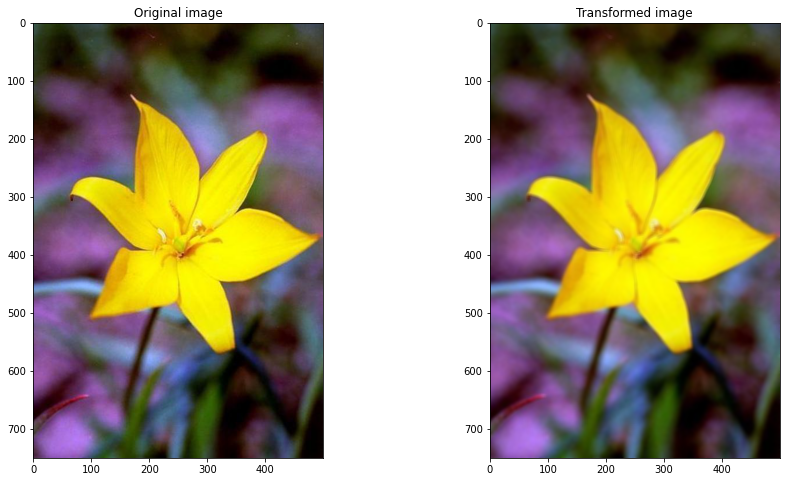

In [35]:
## Applying different filters on the images - Blur
from PIL import Image, ImageFilter

image = Image.open(trainImagesPaths[400])
image2 = image.filter(ImageFilter.BLUR)
#Show both original and transormed image
plot_images(image, image2)

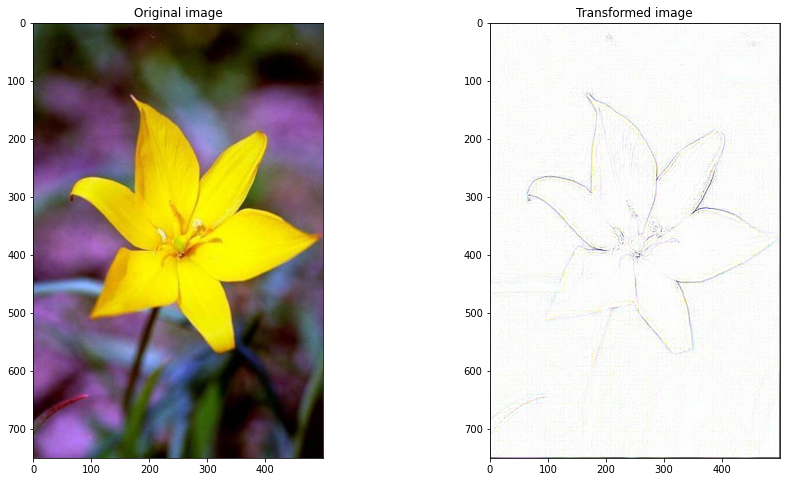

In [36]:
## Applying different filters on the images - Contour
from PIL import Image, ImageFilter

image = Image.open(trainImagesPaths[400])
image2 = image.filter(ImageFilter.CONTOUR)
#Show both original and transormed image
plot_images(image, image2)

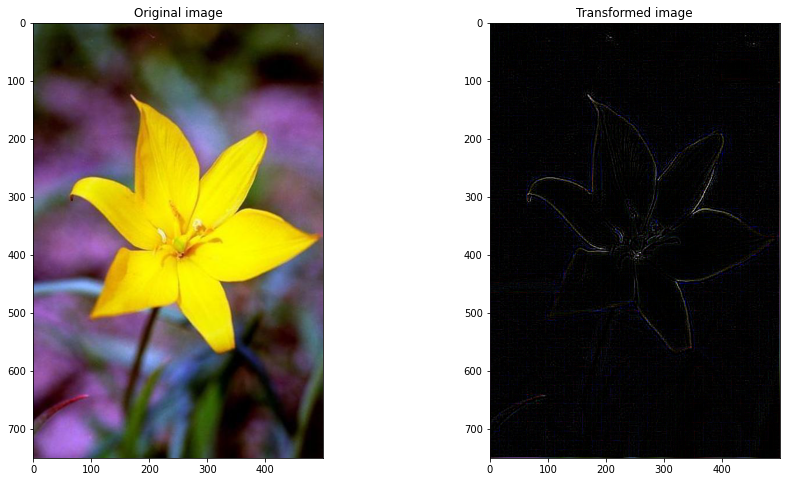

In [37]:
## Applying different filters on the images - edge detection
image = Image.open(trainImagesPaths[400])
image2 = image.filter(ImageFilter.FIND_EDGES)
#Show both original and transormed image
plot_images(image, image2)

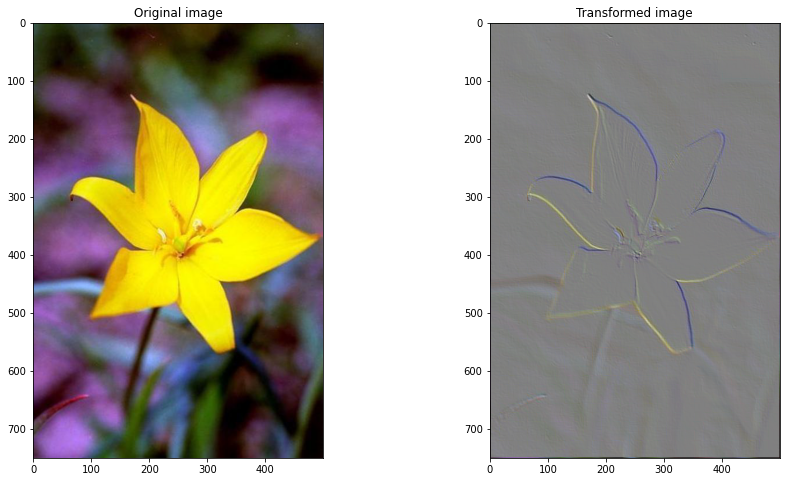

In [38]:
## Applying different filters on the images - Emboss

image = Image.open(trainImagesPaths[400])
image2 = image.filter(ImageFilter.EMBOSS)
#Show both original and transormed image
plot_images(image, image2)

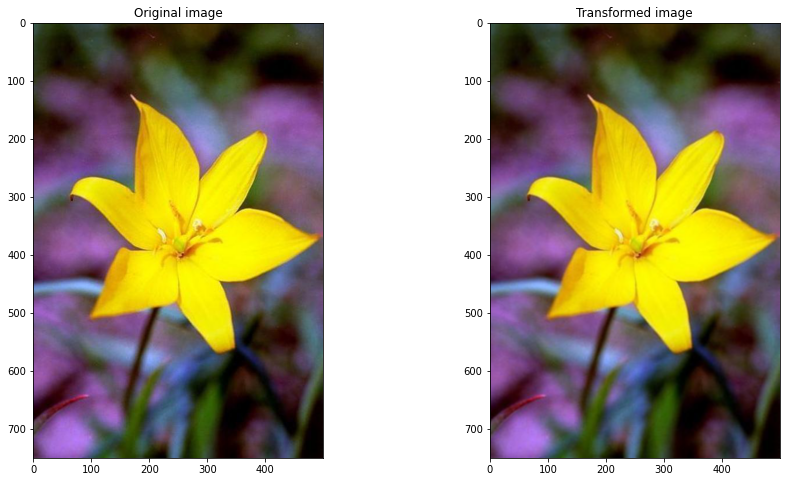

In [39]:
## Applying different filters on the images - Smooth

image = Image.open(trainImagesPaths[400])
image2 = image.filter(ImageFilter.SMOOTH)
#Show both original and transormed image
plot_images(image, image2)

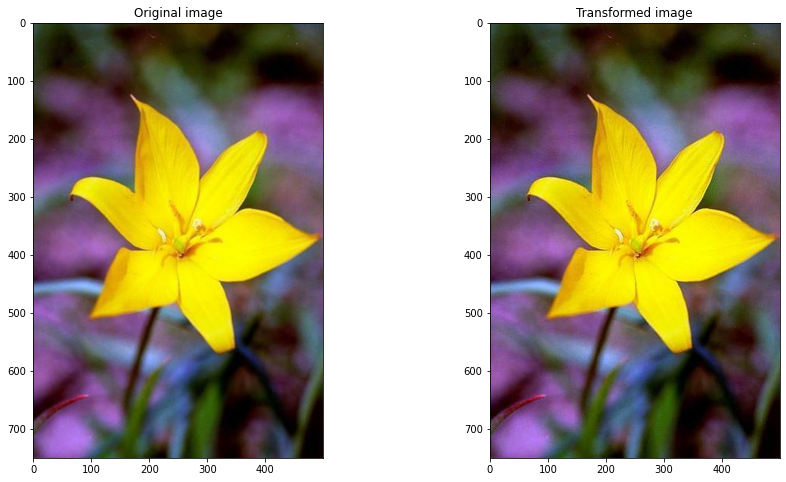

In [40]:
## Applying different filters on the images - Sharpen

image = Image.open(trainImagesPaths[400])
image2 = image.filter(ImageFilter.SHARPEN)
#Show both original and transormed image
plot_images(image, image2)

In [41]:
# Define Train and Test using Image Data Generator
img_size = 128
img_depth = 3

In [53]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
# Since the number of records is less for 17 classes add appropriate image augmentation techniques
#img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               #horizontal_flip=True,
                                                               #width_shift_range=0.2,
                                                               #height_shift_range=0.2,
                                                               #validation_split=0.2)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator( validation_split=0.2)


In [54]:
#Build training generator. 
train_generator = img_generator.flow_from_directory('/content/drive/My Drive/flowers/data/',
                                                    target_size=(img_size, img_size),
                                                    subset='training',
                                                    batch_size=64)

Found 1101 images belonging to 17 classes.


In [55]:
#Build test generator
test_generator = img_generator.flow_from_directory('/content/drive/My Drive/flowers/data/',
                                                   target_size=(img_size, img_size),                                                   
                                                   subset='validation',
                                                   batch_size=64)

Found 274 images belonging to 17 classes.


In [56]:
#Lets check the features (images) and Labels (flower class) returned by ImageDataGenerator
X, y = next(train_generator)

print('Input features shape', X.shape)
print('Actual labels shape', y.shape)

Input features shape (64, 128, 128, 3)
Actual labels shape (64, 17)


In [57]:
## Analysing Y values for labels
y[15]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

#### Neural Networks for training

In [58]:
## Create Neural Network Model 
num_classes=17

model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D 
model.add(tf.keras.layers.Reshape((49152,),input_shape=(128,128,3)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [59]:
# Adding Hidden Layers and Output Layer
model.add(Dense(256, activation='relu')) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [62]:

#Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 49152)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 49152)             196608    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               12583168  
_________________________________________________________________
dense_6 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 17)               

In [64]:
model.fit(train_generator,
          epochs=20,
          steps_per_epoch= 1101//64,  #Number of batches per epoch
          validation_data=test_generator,
          validation_steps = 274/64) #Number of test images//batch_size

Epoch 1/20
17/17 [==============================] - 9s 520ms/step - loss: 5.2247 - accuracy: 0.0874 - val_loss: 18.2354 - val_accuracy: 0.1095
Epoch 2/20
17/17 [==============================] - 8s 489ms/step - loss: 2.7073 - accuracy: 0.2383 - val_loss: 7.8911 - val_accuracy: 0.0730
Epoch 3/20
17/17 [==============================] - 8s 484ms/step - loss: 2.4049 - accuracy: 0.2895 - val_loss: 5.7744 - val_accuracy: 0.0730
Epoch 4/20
17/17 [==============================] - 8s 480ms/step - loss: 2.0210 - accuracy: 0.3891 - val_loss: 4.5645 - val_accuracy: 0.1642
Epoch 5/20
17/17 [==============================] - 8s 482ms/step - loss: 1.6532 - accuracy: 0.4917 - val_loss: 4.6870 - val_accuracy: 0.1971
Epoch 6/20
17/17 [==============================] - 8s 474ms/step - loss: 1.4355 - accuracy: 0.5464 - val_loss: 4.5935 - val_accuracy: 0.2445
Epoch 7/20
17/17 [==============================] - 8s 471ms/step - loss: 1.3299 - accuracy: 0.5810 - val_loss: 3.7882 - val_accuracy: 0.2701
Epoch

In [65]:
## Validation Accuracy
model.evaluate(test_generator)

5/5 [==============================] - 2s 296ms/step - loss: 3.7965 - accuracy: 0.3467


[3.796497106552124, 0.3467153310775757]

In [66]:
model.evaluate(train_generator)

18/18 [==============================] - 6s 355ms/step - loss: 0.6312 - accuracy: 0.8038


[0.6312394142150879, 0.803814709186554]

In [67]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNNProject2/flowers_nn.h5')

#### CNN Model training

In [69]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model_cnn = tf.keras.models.Sequential()

#normalize data
model_cnn.add(tf.keras.layers.BatchNormalization(input_shape=(img_size,img_size,3,)))

#Add Conv Layer
model_cnn.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add Max Pool layer
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Conv Layer
model_cnn.add(tf.keras.layers.Conv2D(64, kernel_size=(4,4), activation='relu'))

#Add Max Pool layer
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Conv Layer
model_cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))

#Add Max Pool layer
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add Conv Layer
model_cnn.add(tf.keras.layers.Conv2D(128, kernel_size=(2,2), activation='relu'))

#Add Max Pool layer
model_cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))


#Add Dense Layers after flattening the data
model_cnn.add(tf.keras.layers.Flatten())
model_cnn.add(tf.keras.layers.Dense(128, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(64, activation='relu'))
model_cnn.add(tf.keras.layers.Dense(32, activation='relu'))

#Add Dropout
model_cnn.add(tf.keras.layers.Dropout(0.25))

#Add Output Layer
model_cnn.add(tf.keras.layers.Dense(17, activation='softmax'))

In [70]:
#Specify Loass and Optimizer
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [83]:
#Model Summary
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 60, 60, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 58, 58, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 58, 58, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [71]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/CNNProject2/flowers_nn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [72]:
model_cnn.fit(train_generator,
          epochs=30,
          steps_per_epoch= 1101//64,  #Number of batches per epoch
          validation_data=test_generator,
          validation_steps = 274//64) #Number of test images//batch_size

Epoch 1/30
17/17 [==============================] - 37s 530ms/step - loss: 2.8401 - accuracy: 0.0656 - val_loss: 3.4753 - val_accuracy: 0.0625
Epoch 2/30
17/17 [==============================] - 9s 515ms/step - loss: 2.6809 - accuracy: 0.1151 - val_loss: 3.1550 - val_accuracy: 0.1680
Epoch 3/30
17/17 [==============================] - 9s 510ms/step - loss: 2.3962 - accuracy: 0.1773 - val_loss: 2.4172 - val_accuracy: 0.2422
Epoch 4/30
17/17 [==============================] - 9s 513ms/step - loss: 2.3714 - accuracy: 0.2180 - val_loss: 2.8992 - val_accuracy: 0.2109
Epoch 5/30
17/17 [==============================] - 9s 516ms/step - loss: 2.1326 - accuracy: 0.2732 - val_loss: 2.1490 - val_accuracy: 0.3242
Epoch 6/30
17/17 [==============================] - 9s 518ms/step - loss: 1.9222 - accuracy: 0.3415 - val_loss: 2.2003 - val_accuracy: 0.3789
Epoch 7/30
17/17 [==============================] - 9s 506ms/step - loss: 1.7947 - accuracy: 0.4078 - val_loss: 1.9117 - val_accuracy: 0.4453
Epoch

In [73]:
## Validation Accuracy
model_cnn.evaluate(test_generator)

5/5 [==============================] - 2s 369ms/step - loss: 1.6126 - accuracy: 0.6679


[1.6126081943511963, 0.6678832173347473]

In [74]:
## Training Accuracy
model_cnn.evaluate(train_generator)

18/18 [==============================] - 7s 380ms/step - loss: 0.1011 - accuracy: 0.9691


[0.10108015686273575, 0.9691190123558044]

#### Transfer Learning

In [80]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[128,128,3], include_top=False)
#pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
#pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMAGE_SIZE, 3])
pretrained_model.trainable = False

model_tf = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(17, activation='softmax')
])

model_tf.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model_tf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 4, 4, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 20480)             0         
_________________________________________________________________
dense (Dense)                (None, 17)                348177    
Total params: 2,606,161
Trainable params: 348,177
Non-trainable params: 2,257,984
_________________________________________________________________


In [81]:
model_tf.fit(train_generator,
          epochs=10,
          steps_per_epoch= 1101//64,  #Number of batches per epoch
          validation_data=test_generator,
          validation_steps = 274//64) #Number of test images//batch_size

Epoch 1/10
17/17 [==============================] - 12s 573ms/step - loss: 8.5741 - accuracy: 0.1023 - val_loss: 4.6047 - val_accuracy: 0.2773
Epoch 2/10
17/17 [==============================] - 8s 490ms/step - loss: 2.8224 - accuracy: 0.3810 - val_loss: 2.6446 - val_accuracy: 0.3438
Epoch 3/10
17/17 [==============================] - 8s 471ms/step - loss: 1.1489 - accuracy: 0.6289 - val_loss: 2.9360 - val_accuracy: 0.3711
Epoch 4/10
17/17 [==============================] - 8s 476ms/step - loss: 0.7725 - accuracy: 0.7607 - val_loss: 2.1252 - val_accuracy: 0.4297
Epoch 5/10
17/17 [==============================] - 8s 484ms/step - loss: 0.4948 - accuracy: 0.8360 - val_loss: 2.0872 - val_accuracy: 0.4688
Epoch 6/10
17/17 [==============================] - 8s 498ms/step - loss: 0.3134 - accuracy: 0.9360 - val_loss: 2.0427 - val_accuracy: 0.4336
Epoch 7/10
17/17 [==============================] - 8s 480ms/step - loss: 0.1871 - accuracy: 0.9843 - val_loss: 2.2246 - val_accuracy: 0.4922
Epoch

In [82]:
model_tf.evaluate(train_generator)

18/18 [==============================] - 7s 387ms/step - loss: 0.0565 - accuracy: 1.0000


[0.05648678168654442, 1.0]

In [83]:
model_tf.evaluate(test_generator)

5/5 [==============================] - 2s 391ms/step - loss: 2.0557 - accuracy: 0.4891


[2.0556578636169434, 0.48905110359191895]

### GUI for Prediction Image



In [ ]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
import re
import os
import cv2
import numpy as np

## Define window
win = tk.Tk()
win.title('CLASSIFIER GUI - Great Learning')

Name=ttk.Label(win,text="Step 1 : File Name")
Name.grid(row=0,column=0,sticky=tk.W)

Name_var=tk.StringVar()
Name_entrybox=ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)

def Import_Data():
    global DB
    img_name=Name_var

def Predict_Image():
    P = cv2.imread(Name_var)
    P = cv2.resize(P, (128, 128))
    Predict_Image.append(dummy)
    Predict_Image=PI.reshape(1,128,128,3)
    DB_Classify['Prediction']=model_cnn.predict(Predict_Image)
    return DB_Classify['Prediction']
  
Import_Data_Button=ttk.Button(win,text="Import Data",command=Import_Data)
Import_Data_Button.grid(row=0,column=2)

Label_Name=ttk.Label(win,text="Image Classifier")
Name.grid(row=1,column=0,sticky=tk.W)

Predict_Button=ttk.Button(win,text="Predict",command=Predict_Image)
Predict_Button.grid(row=2,column=1,sticky=tk.W)


win.mainloop()

### Observations from various training models

CNN and Transfer learning got good accuracy with test data set compared to Neural nets and Supervised learning

Since the number of records are very less Transfer learning and CNN tried to get overfit.

Transfer learning helped to reduce the losses and achieve better accuracy in the initial epochs itself.

Other transfer learning models used (commented out) provided nearly the same result as MobileNet model.

## Part 2 - Question Based

#### Strategy to Maintain and Support AIML Classifier once in Production

Maintaining accuracy of model once in production is key item as part of support and maintenance of AIML model.

Unseen data causes model performance to decay for which model needs to be retrained with the collected data sets and redeployed.

Metrics of Accuracy score and MAE,MSE and RSquared needs to be monitored depending on business needs for model performance and then needs to be retuned if they are at unacceptable level.

As like Devops model development and deployment is a continuous process and another version of production model needs to be improved with new set of data and hyper parameter tuning.